### Business Analytics Group Assignment - Predicting Airbnb Listing Prices in Melbourne__ {-}

--- 

**Kaggle Competition Ends:** Friday, 3 November 2023 @ 2:00pm (Week 13)  
**Assignment Due Date on iLearn:** Friday, 3 November 2023 @ 11.59pm (Week 13)   

**Overview:**   

- In the group assignment you will form a team of 3 students and participate in a forecasting competition on Kaggle
- The goal is to predict listed prices of Airbnb properties in Melbourne based on various Airbnb characteristics and regression models
- Assessment Summary:  
    - Write a problem statement and perform Exploratory Data Analysis  
    - Clean up data, deal with categorical features and missing observations, and create new explanatory variables (feature engineering)  
    - Construct and tune forecasting models, produce forecasts and submit your predictions to Kaggle  
    - Each member of the team will record a video presentation of their work  
    - Marks will be awarded producing a prediction in the top 5 positions of their unit as well as for reaching the highest ranking on Kaggle amongst all teams.

**Instructions:** 

- Form a team of 3 students (minimum 2 students)  
- Each team member needs to join [https://www.kaggle.com](https://www.kaggle.com/)  
- Choose a team leader and form a team in the competition [https://www.kaggle.com/t/f47a2b9a6ccf4a209160ce476de59f53](https://www.kaggle.com/t/f47a2b9a6ccf4a209160ce476de59f53)
    - Team leader to click on `team` and join and invite other team members to join
    - Your **team's name must start** with your unit code, for instance you could have a team called BUSA8001_masterful_geniuses or BUSA3020_l33t 
- All team members should work on all the tasks listed below however   
    - Choose a team member who will be responsible for one of each of the 3 tasks listed below    
- Your predictions must be generated by a model you develop here 
    - You will receive a mark of zero if your code provided here does not produce the forecasts you submit to Kaggle

**Marks**: 

- Total Marks: 40
- Your individual mark will consist of:  
    - 50% x overall assignment mark + 45% x mark for the task that you are responsible for + 5% x mark received from your teammates for your effort in group work 

**Competition Marks:**  

- 1 mark: Ranking in the top 5 places of your unit on Kaggle (make sure you name your team as instructed above)   
- 2 marks: Reaching the first place in your unit (make sure you name your team as instructed above)   


**Submissions:**  

1. On Kaggle: submit your team's forecast in order to be ranked by Kaggle
    - Can do this as many times as necessary while building their model  
2. On iLearn **only team leader to submit** this Jupyter notebook re-named `Group_Assignment_Team_Name.ipynb` where Team_Name is your team's name on Kaggle   
    - The Jupyter notebook must contain team members names/ID numbers, and team name in the competition
    - Provide answers to the 3 Tasks below in the allocated cells including all codes/outputs/writeups 
    - One 15 minute video recording of your work 
        - Each team member to provide a 5 minute presentation of the Task that they led (it is best to jointly record your video using Zoom)
        - When recording your video make sure your face is visible, that you share your Jupyter Notebook and explain everything you've done in the submitted Jupyter notebook on screen
        - 5 marks will be deducted from each Task for which there is no video presentation or if you don't follow the above instructions
        
3. On iLearn each student needs to submit a file with their teammates' names, ID number and a mark for their group effort (out of 100%)



---

**Fill out the following information**

For each team member provide name, Student ID number and which task is performed below

- Team Name on Kaggle: `BUSA3020_123`
- Team Leader and Team Member 1: `Tuan Minh Phan`
- Team Member 2: `Hoang Phuc Nguyen`
- Team Member 3: `Phuc Linh Nguyen`

---

## Task 1: Problem Description and Initial Data Analysis {-}

1. Read the Competition Overview on Kaggle [https://www.kaggle.com/t/f47a2b9a6ccf4a209160ce476de59f53)
2. Referring to Competition Overview and the data provided on Kaggle write about a 500 words **Problem Description** focusing on key points that will need to be addressed as first steps in Tasks 2 and 3 below, using the following headings:
    - Forecasting Problem - explain what you are trying to do and how it could be used in the real world (i.e. why it may be important)
    - Evaluation Criteria - explain the criteria is used to assess forecast performance 
    - Types of Variables/Features
    - Data summary and main data characteristics
    - Missing Values (only explain what you found at this stage)
    - Hint: you should **not** discuss any specific predictive algorithms at this stage
    - Note: This task should be completed in a single Markdown cell (text box)
    
Total Marks: 12


Variable 'name' has 1 missing values.
Variable 'description' has 57 missing values.
Variable 'neighborhood_overview' has 1823 missing values.
Variable 'host_location' has 1280 missing values.
Variable 'host_about' has 2270 missing values.
Variable 'host_acceptance_rate' has 63 missing values.
Variable 'host_neighbourhood' has 3460 missing values.
Variable 'neighbourhood' has 1823 missing values.
Variable 'neighbourhood_cleansed' has 108 missing values.
Variable 'property_type' has 84 missing values.
Variable 'room_type' has 134 missing values.
Variable 'bathrooms' has 6 missing values.
Variable 'bedrooms' has 378 missing values.
Variable 'beds' has 72 missing values.
Variable 'minimum_minimum_nights' has 45 missing values.
Variable 'maximum_maximum_nights' has 45 missing values.
Variable 'availability_365' has 47 missing values.
Variable 'review_scores_accuracy' has 22 missing values.
Variable 'review_scores_cleanliness' has 22 missing values.
Variable 'review_scores_checkin' has 22 mi

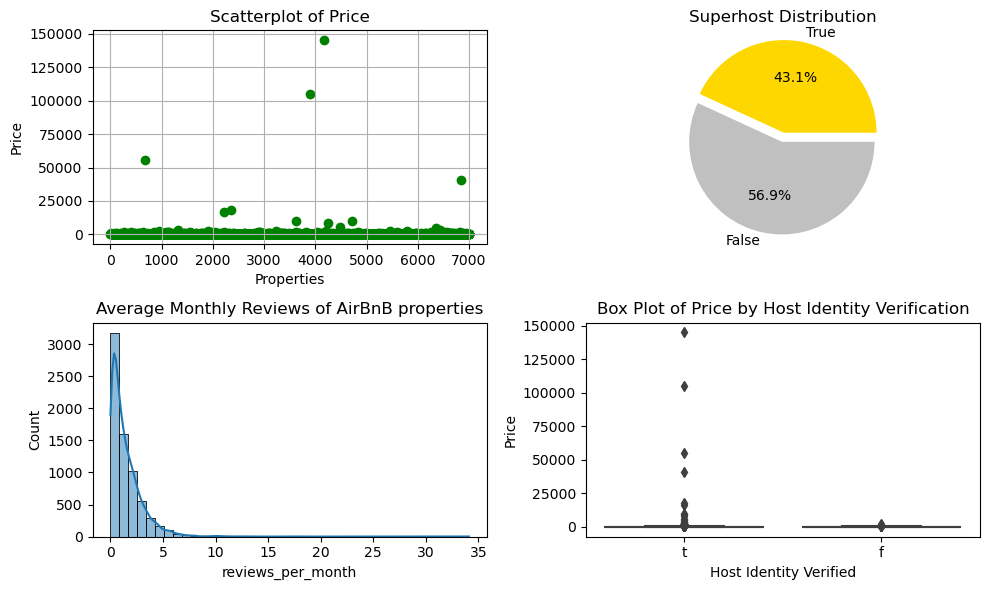

In [1]:
# Task 1 code here
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

for column in df_train.columns:
    missing_count = df_train[column].isnull().sum()
    if missing_count > 0:
        print(f"Variable '{column}' has {missing_count} missing values.")

df_train['price'] = df_train['price'].astype(str)
df_train['price'] = df_train['price'].str.replace('$', '', regex=False)
df_train['price'] = df_train['price'].str.replace(',', '')
df_train['price'] = df_train['price'].astype(float)

true_count = len(df_train[df_train['host_is_superhost'] == 't'])
false_count = len(df_train[df_train['host_is_superhost'] == 'f'])

data = {'True': true_count, 'False': false_count}

labels = 'True', 'False' 
colors = ['gold', 'silver']
explode = (0.1, 0)

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
price_data = df_train['price']

# Create a scatterplot with row numbers on the x-axis
x = range(len(price_data))
y = price_data


plt.scatter(x, y, c='green', marker='o', label='Price')
plt.xlabel('Properties')
plt.ylabel('Price')
plt.title('Scatterplot of Price')
plt.grid(True)


plt.subplot(2,2,2)
plt.pie(data.values(), labels=labels, colors=colors, explode=explode, autopct='%1.1f%%')
plt.title('Superhost Distribution')
plt.axis('equal')


plt.subplot(2,2,3)
sns.histplot(data = df_train, x="reviews_per_month", bins = 40, kde = True)
plt.title("Average Monthly Reviews of AirBnB properties")

plt.subplot(2,2,4)
sns.boxplot(x='host_identity_verified', y='price', data=df_train)
plt.xlabel('Host Identity Verified')
plt.ylabel('Price')
plt.title('Box Plot of Price by Host Identity Verification')

plt.tight_layout()
plt.show()

### Problem Description
**Forecasting Problem:**  
In the forecasting task, the goal is to predict Airbnb listing prices in Melbourne using regression modelling. Airbnb is an internet platform that links homeowners wishing to rent out their properties with travellers searching for lodging in certain areas. As per the most recent data provided by Airbnb, the platform has over 7 million listings, encompassing about 100,000 cities and towns across more than 220 countries and regions globally. This task has real-world significance for multiple stakeholders. Accurate price predictions empower hosts to optimize their pricing strategy and maximize profit while customers can make choices aligning with their budget and preferences. Airbnb, as the platform connecting these parties, gains from enhanced user experience and increased bookings. The regression model leverages property characteristics and historical pricing data to generate accurate price forecasts. In summary, forecasting Airbnb listing prices benefits hosts, customers, and Airbnb by enhancing property management, user satisfaction, and platform success in the short-term rental market.

**Evaluation Criteria:**
- The evaluation criteria for assessing forecast performance in this project will primarily rely on the Root Mean Squared Error (RMSE). 
- RMSE is a widely used metric for regression tasks, and it measures the average magnitude of the errors between predicted and actual values. In the context of price forecasting, RMSE will provide insight into how well the model performs in predicting Airbnb listing prices.

**Type of Features:**
1. Numerical Features:'accommodates', 'bathrooms', 'bedrooms', 'beds', 'latitude' and 'longitude', 'availability_30', 'availability_60', 'availability_90', and 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d'

2. Categorical Features: 'property_type', 'room_type', 'host_is_superhost', 'instant_bookable', 'host_has_profile_pic' and 'host_identity_verified'

3. Text (String) Features:'name', 'description', 'neighborhood_overview', 'host_name', 'host_location', 'host_about', 'host_neighbourhood', 'amenities'

4. Date Features: 'host_since', 'first_review', 'last_review'

5. Target Variable: 'price'
- This is the target variable that we attempt to predict. It represents the daily price of Airbnb properties in the local currency ($AUD).

**Data Summary and Main Data Characteristics:**

Overall, upon examination of the preceding data matrices, it is observed that the majority of AirBnb accommodations are offered at a moderate price point, with an average daily rate not exceeding `$25,000`. Nonetheless, there exist notable exceptions, as certain listings are priced significantly higher, reaching up to `$60,000` per day, with the most extreme case recorded at `$145,160` daily. In the context of host status, the data indicates that 56.9% of property owners have not attained 'Superhost' status, in contrast to 43.1% who have been acknowledged as Superhosts, totaling 3,983 and 3,017 proprietors respectively. Moreover, these listings garner an average monthly review frequency of less than 4, with a span ranging from 0.1 to 2.5 reviews per month. Additionally, the datasets suggest a trend where properties managed by hosts with verified identities command higher pricing than those overseen by proprietors lacking verification.

**Missing Values:**

In the examined dataset, the variable 'host_neighbourhood' has the most significant proportion of missing data, with 3,460 instances (49.43%). The features 'host_about' and 'neighborhood_overview' also exhibit substantial data gaps, with 2,270 (32.43%) and 1,823 (25.99%) missing entries, respectively. A cluster of variables including 'bedrooms', various 'review_scores' categories, and 'host_location' each have 22 missing values, impacting 0.31% of their data. 'Beds', 'minimum_minimum_nights', 'maximum_maximum_nights', and 'availability_365' present 72, 45, 45, and 47 data omissions, corresponding to around 1.03%, 0.65%, 0.65%, and 0.67% respectively. 'Bathrooms', 'property_type', and 'room_type' exhibit minor discrepancies with 6, 84, and 134 absences (0.09%, 1.2%, and 1.91%). The 'name' variable has a negligible single missing entry, affecting 0.01% of its records.


 ---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering {-}
- In this task you will follow a set of instructions/questions listed below.
- Make sure you **explain** each step you do both in Markdown text and on your video.
    - Do not just read out your commands without explaining what they do and why you used them 

Total Marks: 12

**Task 2, Question 1**: Clean **all** numerical features and the target variable `price` so that they can be used in training algorithms. For instance, `host_response_rate` feature is in object format containing both numerical values and text. Extract numerical values (or equivalently eliminate the text) so that the numerical values can be used as a regular feature.  
(2 marks)

In [2]:
## Task 2, Question 1 Code Here
df = pd.concat([df_train, df_test], axis = 0, ignore_index=True)

unique_values = df['bathrooms'].unique()
unique_values

df['bathrooms'] = df['bathrooms'].astype(str)
df['bathrooms'] = df['bathrooms'].str.replace('Shared half-bath', '0.5')
df['bathrooms'] = df['bathrooms'].str.replace('Half-bath', '1')
df['bathrooms'] = df['bathrooms'].str.replace('Private half-bath', '1')
df['bathrooms'] = df['bathrooms'].str.replace(' baths', '')
df['bathrooms'] = df['bathrooms'].str.replace(' bath', '')
df['bathrooms'] = df['bathrooms'].str.replace(' shared', '')
df['bathrooms'] = df['bathrooms'].str.replace(' private', '')
df['bathrooms'] = df['bathrooms'].str.replace('Private', '0.5')
df['bathrooms'] = pd.to_numeric(df['bathrooms'], errors='coerce')

In [3]:
df['host_response_rate'] = df['host_response_rate'].astype(str)
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '')
df['host_response_rate'] = pd.to_numeric(df['host_response_rate'], errors='coerce')

df['host_acceptance_rate'] = df['host_acceptance_rate'].astype(str)
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace('%', '')
df['host_acceptance_rate'] = pd.to_numeric(df['host_acceptance_rate'], errors='coerce')

df['host_listings_count'] = df['host_listings_count'].astype(int)

`(Task 2, Question 1 Text Here - insert more cells as required)`

**Task 2, Question 2** Create at least 4 new features from existing features which contain multiple items of information, e.g. creating `email`,  `phone`, `work_email`, etc. from feature `host_verifications`.  
(2 marks)


host_since: current date - host date to measure how long they been hosting
after removing dollar sign or % sign use to_numeric, to_int, to_float to convert variable
host_verifications: extract elements from this variable to create new 4 variables, if it appears in here, it is equal to 1 

In [4]:
## Task 2, Question 2 Code Here
df['email'] = df['host_verifications'].apply(lambda x: 1 if 'email' in x else 0)
df['phone'] = df['host_verifications'].apply(lambda x: 1 if 'phone' in x else 0)
df['work_email'] = df['host_verifications'].apply(lambda x: 1 if 'work_email' in x else 0)
df['bed_per_accommodate'] = df['beds']/df['accommodates']
df['bath_per_accommodate'] = df['bathrooms']/df['accommodates']

In [5]:
df['host_since'] = pd.to_datetime(df['host_since'])
current_date = datetime.now()
df['days_since_hosting'] = (current_date - df['host_since']).dt.days

df['last_review'] = pd.to_datetime(df['last_review'])
current_date = datetime.now()
df['days_since_last_review'] = (current_date - df['last_review']).dt.days

df.drop(columns = ['host_since', 'host_verifications', 'last_review'], inplace = True)

`(Task 2, Question 2 Text Here)`

**Task 2, Question 3**: Impute missing values for all features in both training and test datasets. Hint: make sure you do **not** impute the price in the test dataset.
(3 marks)

In [6]:
## Task 2, Question 3 Code Here
df.loc[:,["description", "neighborhood_overview", "host_about", "name", "neighbourhood", "host_neighbourhood", "first_review"]].fillna("No data")
df_cat = df.loc[:,['host_location', 'host_response_time', 'host_is_superhost', 'property_type', 'room_type']]
df_num = df.loc[:, ['host_response_rate', 'host_acceptance_rate', 'bathrooms', 'bedrooms', 'beds', 'bed_per_accommodate', 'availability_365',
                    'review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                    'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month',
                    'days_since_last_review', "minimum_minimum_nights", "maximum_minimum_nights",
                    "minimum_maximum_nights", "maximum_maximum_nights", 'bath_per_accommodate']]

In [7]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
np_cat = imp.fit_transform(df_cat)

In [8]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values= np.nan, strategy="mean")
np_num = imp.fit_transform(df_num)

In [9]:
df_cat = pd.DataFrame(np_cat, columns = ['host_location', 'host_response_time', 'host_is_superhost', 'property_type', 'room_type'])
df_num = pd.DataFrame(np_num, columns = ['host_response_rate', 'host_acceptance_rate', 'bathrooms', 'bedrooms', 'beds', 'bed_per_accommodate', 'availability_365',
                    'review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin',
                    'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month',
                    'days_since_last_review', "minimum_minimum_nights", "maximum_minimum_nights",
                    "minimum_maximum_nights", "maximum_maximum_nights", 'bath_per_accommodate'])
df_rest = df.drop(columns=df_cat.columns.tolist() + df_num.columns.tolist())
df = pd.concat([df_cat,df_num], axis=1)
df = pd.concat([df,df_rest], axis=1)

In [10]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [11]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="myapp")

def find_location(latitude, longitude):
    location = geolocator.reverse(str(latitude)+","+str(longitude))
    try: 
        return location.raw['address']['suburb']
    except: 
        return location.address

for index, row in df.iterrows():
    if pd.isna(row['neighbourhood_cleansed']):
        location = find_location(row['latitude'], row['longitude'])
        df.at[index, 'neighbourhood_cleansed'] = location

`(Task 2, Question 3 Text Here)`

**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class. 


Where a categorical feature contains more than 5 unique values, map the feature into 5 most frequent values + 'other' and then encode appropriately. For instance, you could group then map `property_type` into 5 most frequent property types + 'other'  
(2 marks)

In [12]:
## Task 2, Question 4 Code Here
response_time_mapping = {'within an hour': 0, 'within a few hours': 1, 'within a day': 2, 'a few days or more': 3}
df['host_response_time'] = df['host_response_time'].map(response_time_mapping)

property_counts = df['property_type'].value_counts()
top_property_types = property_counts.head(5).index
df['property_type'] = df['property_type'].apply(lambda x: x if x in top_property_types else "Other")

room_type_counts = df['room_type'].value_counts()
top_room_types = room_type_counts.head(4).index
df['room_type'] = df['room_type'].apply(lambda x: x if x in top_room_types else "Other")

property_type_mapping = {'Entire home': 0, 'Entire rental unit': 1, 'Entire condo': 2, 'Private room in rental unit': 3, 
                         'Private room in home': 4, 'Other': 5}
df['property_type'] = df['property_type'].map(property_type_mapping).astype(int)

room_type_mapping = {'Entire home/apt': 0, 'Hotel room': 1, 'Private room': 2, 'Shared room': 3, 'Other': 4}
df['room_type'] = df['room_type'].map(room_type_mapping).astype(int)

import ast

def count_amenities(cell):
    amenities = ast.literal_eval(cell)
    return len(amenities)

df['amenities_count'] = df['amenities'].apply(count_amenities)

mapping_dict = {'t': 1, 'f': 0}
df = df.applymap(lambda x: mapping_dict.get(x, x))

`(Task 2, Question 4 Text Here)`

**Task 2, Question 5**: Perform any other actions you think need to be done on the data before constructing predictive models, and clearly explain what you have done.   
(1 marks)

In [13]:
## Task 2, Question 5 Code Here
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['neighbourhood_cleansed_enc'] = le.fit_transform(df['neighbourhood_cleansed'])


columns_to_drop = ["description", "neighborhood_overview", 
                   "host_about", "host_name", "name", "ID", "neighbourhood",
                   "minimum_minimum_nights", "maximum_minimum_nights",
                   "minimum_maximum_nights", "maximum_maximum_nights",
                   "host_neighbourhood", "first_review","amenities", 
                   "longitude", "latitude", "source", "calculated_host_listings_count_entire_homes", 
                   "calculated_host_listings_count_private_rooms", 'neighbourhood_cleansed',
                   "calculated_host_listings_count_shared_rooms", 'host_location']

df.drop(columns=columns_to_drop, inplace=True)

`(Task 2, Question 5 Text Here)`

**Task 2, Question 6**: Perform exploratory data analysis to measure the relationship between the features and the target and write up your findings. 
(2 marks)

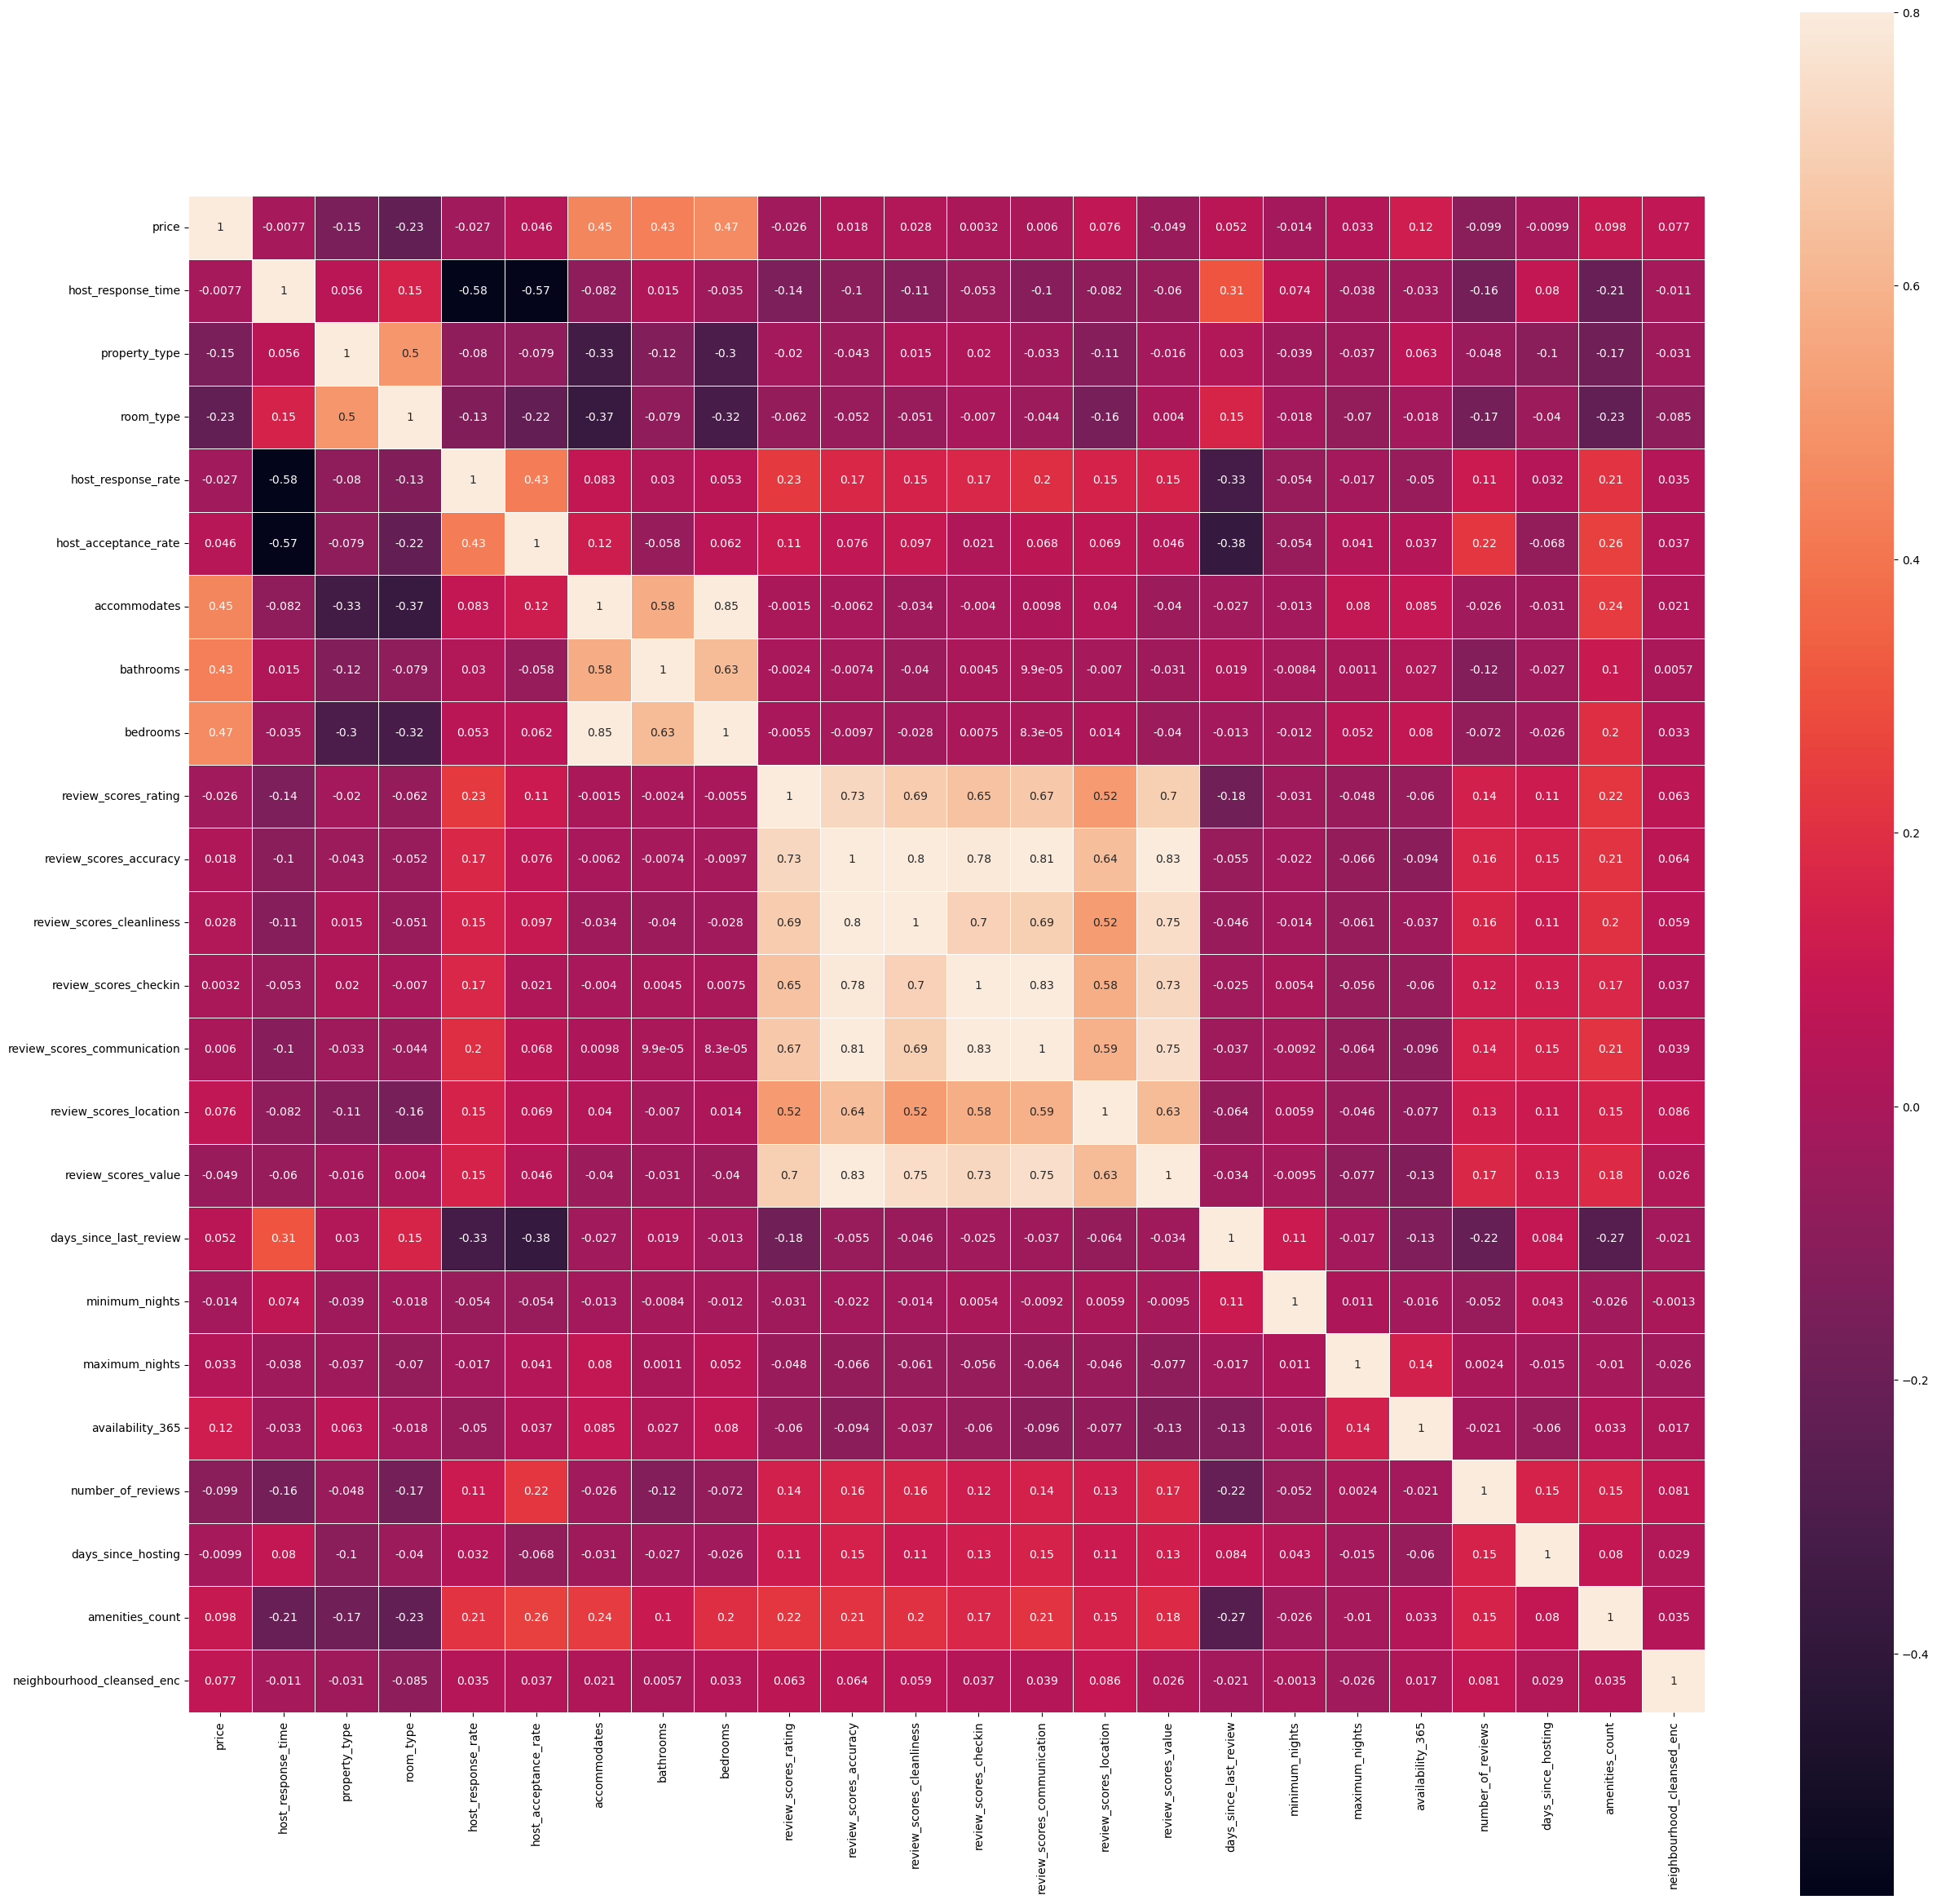

In [14]:
## Task 2, Question 6 Code Here
import seaborn as sns
import matplotlib.pyplot as plt

df['price'] = df['price'].apply(lambda x: x/10 if 7000 <= x < 100000 else x)
df['price'] = df['price'].apply(lambda x: x/100 if 100000 <= x < 1000000 else x)
df_train =  df.iloc[:7000,:]
df_test = df.iloc[7000:,:]


corr_columns= df_train[['price', 'host_response_time', 'property_type', 'room_type', 
                 'host_response_rate', 'host_acceptance_rate', 'accommodates', 'bathrooms', 'bedrooms', 
                 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value',
                 'days_since_last_review', 'minimum_nights', 'maximum_nights', 'availability_365', 
                 'number_of_reviews', 'days_since_hosting', 'amenities_count','neighbourhood_cleansed_enc']]
corr_matrix = corr_columns.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True, vmax=.8, square=True, linewidths=0.5)
plt.show()

`(Task 2, Question 6 Text Here)`
- **Comments:** The correlation matrix indicates that there is no linear relationship between target variable 'price' and other features in the train.csv dataset since their correlation coefficients are relatively close to 0 (from -0.02 to 0.04). This implies that the relationship between target variable and other predictors is non-linear, thus more advanced regression models should be employed to capture the nonlinearity of the dataset and better predict the target variable.

--- 
## Task 3: Fit and tune a forecasting model/Submit predictions/Report score and ranking {-}

Make sure you **clearly explain each step** you do, both in text and on the recoded video.

1. Build a machine learning (ML) regression model by taking into account the outcomes of Tasks 1 & 2 (Explain carefully)
2. Fit the model and tune hyperparameters via cross-validation: make sure you comment and explain each step clearly
3. Create predictions using the test dataset and submit your predictions on Kaggle's competition page
4. Provide Kaggle ranking and **score** (screenshot your best submission) and Comment
5. Make sure your Python code works, so that a marker that can replicate your all of your results and obtain the same RMSE from Kaggle

- Hint: to perform well in this assignment you will need to iterate Tasks 2 & 3, creating new features and training various models in order to find the best one.

Total Marks: 12

In [15]:
# Task 3 code here
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [16]:
#Random Forest Regressor
X_train = df_train.drop(columns = ['price'], axis = 1)
y_train = df_train['price']

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)

X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#Instantiate base model
rf_reg = RandomForestRegressor(random_state=42)

#Tuning hyperparameters
gs = GridSearchCV(rf_reg, param_grid, cv=5)
gs.fit(X_train_scaled, y_train)

#Get best hyperparameters
print("Best parameters:", gs.best_params_)
print("Best score:", -gs.best_score_)

best_model = gs.best_estimator_

rf_reg = best_model.fit(X_train_scaled, y_train)

X_val_scaled = sc.fit_transform(X_val)
y_val_pred = rf_reg.predict(X_val_scaled)

rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print(f'R-squared of Random Forest Regression: {r2}')
print(f"Root Mean Squared Error (RMSE) of Random Forest Regression : {rmse}")

X_test = df_test.drop(columns = ['price'], axis = 1)
X_test_scaled = sc.fit_transform(X_test)

y_pred = rf_reg.predict(X_test_scaled) 

Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Best score: -0.36638442774088864
R-squared of Random Forest Regression: 0.6876990667255514
Root Mean Squared Error (RMSE) of Random Forest Regression : 119.33421959378202


In [17]:
#XGBoost Regressor
X_train = df_train.drop(columns = ['price'], axis = 1)  
y_train = df_train['price']

X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42) 

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)

xgb = XGBRegressor(booster = 'gblinear', eval_metric='rmse', objective='reg:squarederror', random_state=42)

param_range = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0]
param_grid = {"n_estimators": range(10, 100, 10),
              "eta": param_range}

gs = GridSearchCV(estimator=xgb,      
                  param_grid=param_grid,
                  cv=5,
                  n_jobs=-1)


gs = gs.fit(X_train_scaled, y_train)

print("Best parameters:", gs.best_params_)
print("Best score:", -gs.best_score_)

best_classifier = gs.best_estimator_ 

X_val_scaled = sc.fit_transform(X_val)
y_val_pred = best_classifier.predict(X_val_scaled)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print(f"Root Mean Squared Error (RMSE) of XGBoost Regression: {rmse}")
print(f"R-Squared of XGBoost Regression: {r2}")

X_test = df_test.drop(columns = ['price'], axis = 1)
X_test_scaled = sc.fit_transform(X_test)

y_pred = best_classifier.predict(X_test_scaled)

Best parameters: {'eta': 0.01, 'n_estimators': 70}
Best score: -0.2905225727589905
Root Mean Squared Error (RMSE) of XGBoost Regression: 169.77802188640848
R-Squared of XGBoost Regression: 0.36787025604729817


In [18]:
#Elastic Net Regressor
X_train = df_train.drop(columns = ['price'], axis = 1)  
y_train = df_train['price']

X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42) 

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)

elasticnet = ElasticNet()

elasticnet.fit(X_train_scaled, y_train)

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 
               'l1_ratio': [ 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

gs = GridSearchCV(estimator=elasticnet, param_grid=param_grid, cv=5)
gs.fit(X_train_scaled, y_train)

print("Best parameters:", gs.best_params_)
print("Best score:", -gs.best_score_)

best_model = gs.best_estimator_

X_val_scaled = sc.fit_transform(X_val)
y_val_pred = best_model.predict(X_val_scaled)
rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2 = r2_score(y_val, y_val_pred)

print(f"Root Mean Squared Error (RMSE) of Elastic Net: {rmse}")
print(f"R-Squared of Elastic Net: {r2}")

X_test = df_test.drop(columns = ['price'], axis = 1)
X_test_scaled = sc.fit_transform(X_test)

y_pred = best_model.predict(X_test_scaled)

Best parameters: {'alpha': 0.1, 'l1_ratio': 0.7}
Best score: -0.3343351520093819
Root Mean Squared Error (RMSE) of Elastic Net: 167.29968615734077
R-Squared of Elastic Net: 0.3861905930256456


### Model Validation

| Regression Model | RMSE | R-Squared |
|--------------|-----------|-----------|
| Random Forest |119.239 |0.688 |
| XG Boost |169.778 | 0.368 |
| Elastic Net |167.300 |0.386 |

### Kaggle Ranking & Score

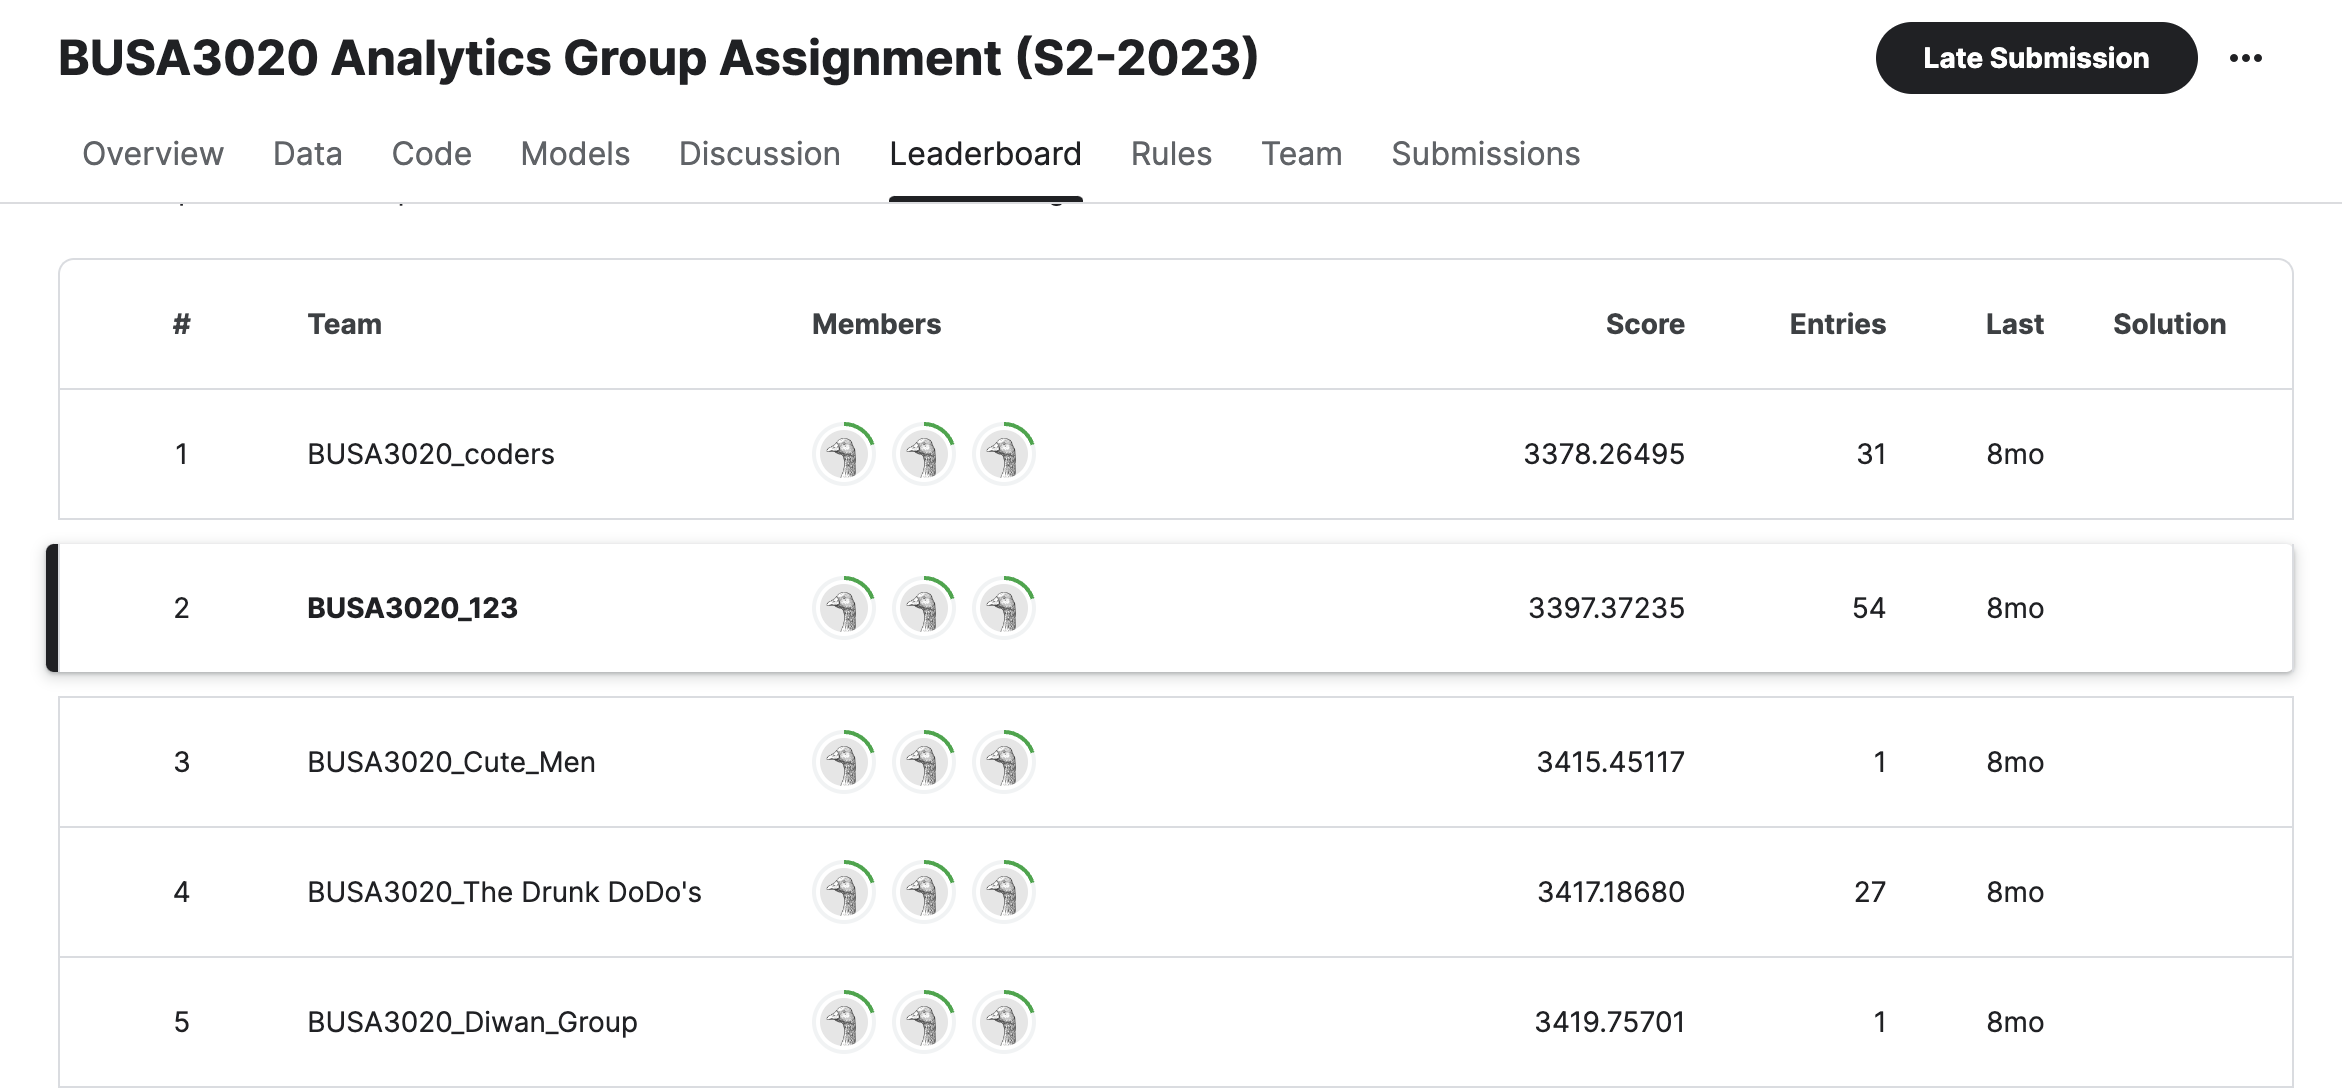

In [19]:
from IPython.display import Image
Image(filename='Rankings.png',width = "600",height = "300")

`(Task 3 - insert more cells as required)`